In [1]:
import pandas as pd
df= pd.read_csv('Dataset Text.csv')

In [2]:
df

,Kalimat,Label,Text
0,R1,supports,competition can effectively promote the develo...
1,R2,attacks,competition can effectively promote the develo...
2,R3,supports,what we acquired from team work is not only ho...
3,R4,supports,through cooperation children can learn about i...
4,R5,supports,all of these skills help them to get on well w...
...,...,...,...
1034,R19,attacks,the use of cctv cameras does cause controversy...
1035,R20,supports,this is chiefly to shield oneself from being h...
1036,R21,attacks,privacies are lost with the use of these camer...
1037,R22,attacks,safety should be put first in order to be safe...


In [3]:
print(df.shape)
df.isnull().sum()
df['Label'].value_counts()

(1039, 3)


supports    906
attacks     133
Name: Label, dtype: int64

In [4]:

df

,Kalimat,Label,Text
0,R1,supports,competition can effectively promote the develo...
1,R2,attacks,competition can effectively promote the develo...
2,R3,supports,what we acquired from team work is not only ho...
3,R4,supports,through cooperation children can learn about i...
4,R5,supports,all of these skills help them to get on well w...
...,...,...,...
1034,R19,attacks,the use of cctv cameras does cause controversy...
1035,R20,supports,this is chiefly to shield oneself from being h...
1036,R21,attacks,privacies are lost with the use of these camer...
1037,R22,attacks,safety should be put first in order to be safe...


Text(0.5, 1.0, 'Label Data Distribution')

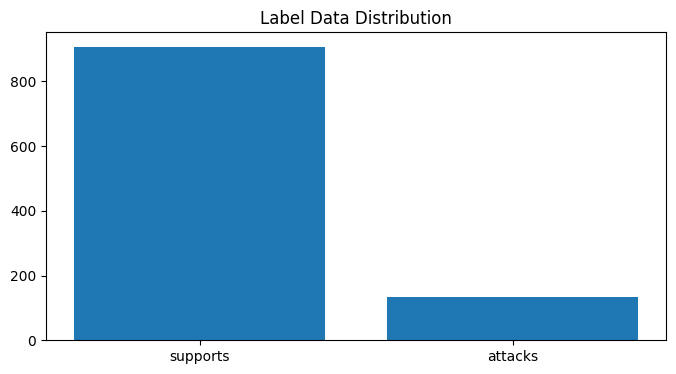

In [5]:
import matplotlib.pyplot as plt

val_count = df.Label.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title('Label Data Distribution')

In [6]:
df['length'] = df['Text'].apply(lambda x: len(x))

In [7]:
df.head()

,Kalimat,Label,Text,length
0,R1,supports,competition can effectively promote the develo...,201
1,R2,attacks,competition can effectively promote the develo...,110
2,R3,supports,what we acquired from team work is not only ho...,257
3,R4,supports,through cooperation children can learn about i...,352
4,R5,supports,all of these skills help them to get on well w...,226


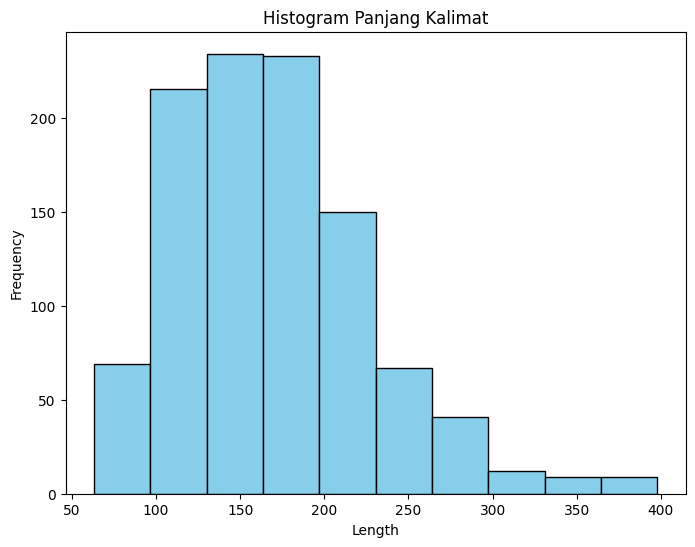

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = df['length']

plt.figure(figsize=(8, 6))
plt.hist(df['length'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram Panjang Kalimat')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


In [9]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['Text'].values)
x = tokenizer.texts_to_sequences(df['Text'].values)
x = pad_sequences(x)

In [10]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import re

def convert_to_lower(Text):
    return Text.lower()

def remove_numbers(Text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=Text)
    return without_number

def remove_punctuation(Text):
     return Text.translate(str.maketrans('', '', string.punctuation))

def remove_stopwords(Text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(Text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

def remove_extra_white_spaces(Text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=Text)
    return without_sc

def lemmatizing(Text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(Text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)



df['Text'] = df['Text'].apply(lambda x: convert_to_lower(x))
df['Text'] = df['Text'].apply(lambda x: remove_numbers(x))
df['Text'] = df['Text'].apply(lambda x: remove_punctuation(x))
df['Text'] = df['Text'].apply(lambda x: remove_extra_white_spaces(x))
df['Text'] = df['Text'].apply(lambda x: lemmatizing(x))


In [12]:
label_map = {
    'supports': 0,
    'attacks': 1,
}

df['Label'] = df['Label'].map(label_map)
df['length_after_cleaning'] = df['Text'].apply(lambda x: len(x))

df

,Kalimat,Label,Text,length,length_after_cleaning
0,R1,0,competition can effectively promote the develo...,201,195
1,R2,1,competition can effectively promote the develo...,110,110
2,R3,0,what we acquired from team work is not only ho...,257,252
3,R4,0,through cooperation child can learn about inte...,352,341
4,R5,0,all of these skill help them to get on well wi...,226,220
...,...,...,...,...,...
1034,R19,1,the use of cctv camera doe cause controversy c...,96,93
1035,R20,0,this is chiefly to shield oneself from being h...,155,152
1036,R21,1,privacy are lost with the use of these camera ...,124,120
1037,R22,1,safety should be put first in order to be safe...,95,92


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_wb= TfidfVectorizer()

X_tf = tf_wb.fit_transform(df['Text'])

In [14]:
import numpy as np

X_tf = X_tf.toarray()

print(X_tf.shape)
print(X_tf)

(1039, 2711)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size=0.2, random_state=42)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)


In [17]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

In [18]:
# Tanpa Balancing dlu bwang
from sklearn.metrics import classification_report, accuracy_score

# tanpa balancing data
nb.fit(X_train_tf, y_train)
y_pred_no_balancing = nb.predict(X_test_tf)

# classification report tanpa balancing data
print("Classification Report (No Balancing):")
print(classification_report(y_test, y_pred_no_balancing))
accuracy_no_balancing = accuracy_score(y_test, y_pred_no_balancing)
print(f"Accuracy (No Balancing): {accuracy_no_balancing:.4f}\n")

Classification Report (No Balancing):
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       181
           1       0.00      0.00      0.00        27

    accuracy                           0.87       208
   macro avg       0.44      0.50      0.47       208
weighted avg       0.76      0.87      0.81       208

Accuracy (No Balancing): 0.8702



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# Model dengan balancing data ROS

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_tf, y_train)

nb_ros = MultinomialNB()
nb_ros.fit(X_train_ros, y_train_ros)
y_pred_ros = nb_ros.predict(X_test_tf)


print("Classification Report (Random OverSampling):")
print(classification_report(y_test, y_pred_ros))

accuracy_ros = accuracy_score(y_test, y_pred_ros)
print(f"Accuracy (Random OverSampling): {accuracy_ros:.4f}\n")

Classification Report (Random OverSampling):
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       181
           1       0.28      0.41      0.33        27

    accuracy                           0.78       208
   macro avg       0.59      0.62      0.60       208
weighted avg       0.82      0.78      0.80       208

Accuracy (Random OverSampling): 0.7837



In [20]:
# Model dengan balancing data SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tf, y_train)

nb_smote = MultinomialNB()
nb_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = nb_smote.predict(X_test_tf)

print("Classification Report (SMOTE):")
print(classification_report(y_test, y_pred_smote))

accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"Accuracy (SMOTE): {accuracy_smote:.4f}")


Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       0.90      0.83      0.87       181
           1       0.27      0.41      0.32        27

    accuracy                           0.78       208
   macro avg       0.59      0.62      0.60       208
weighted avg       0.82      0.78      0.80       208

Accuracy (SMOTE): 0.7788


In [21]:
# Model dengan balancing data ADASYN
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_tf, y_train)

nb_adasyn = MultinomialNB()
nb_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_adasyn = nb_adasyn.predict(X_test_tf)

print("Classification Report (ADASYN):")
print(classification_report(y_test, y_pred_adasyn))

accuracy_adasyn = accuracy_score(y_test, y_pred_adasyn)
print(f"Accuracy (ADASYN): {accuracy_adasyn:.4f}\n")

Classification Report (ADASYN):
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       181
           1       0.24      0.37      0.29        27

    accuracy                           0.76       208
   macro avg       0.57      0.60      0.57       208
weighted avg       0.81      0.76      0.78       208

Accuracy (ADASYN): 0.7644



In [22]:
# Model dengan balancing data BorderlineSMOTE

from imblearn.over_sampling import BorderlineSMOTE

borderline_smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)
X_train_borderline_smote, y_train_borderline_smote = borderline_smote.fit_resample(X_train_tf, y_train)

nb_borderline_smote = MultinomialNB()
nb_borderline_smote.fit(X_train_borderline_smote, y_train_borderline_smote)
y_pred_borderline_smote = nb_borderline_smote.predict(X_test_tf)

print("Classification Report (BorderlineSMOTE):")
print(classification_report(y_test, y_pred_borderline_smote))

accuracy_borderline_smote = accuracy_score(y_test, y_pred_borderline_smote)
print(f"Accuracy (BorderlineSMOTE): {accuracy_borderline_smote:.4f}\n")


Classification Report (BorderlineSMOTE):
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       181
           1       0.31      0.48      0.38        27

    accuracy                           0.79       208
   macro avg       0.61      0.66      0.63       208
weighted avg       0.84      0.79      0.81       208

Accuracy (BorderlineSMOTE): 0.7933



In [23]:
# Model dengan balancing data SMOTETomek
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train_tf, y_train)

nb_smote_tomek = MultinomialNB()
nb_smote_tomek.fit(X_train_smote_tomek, y_train_smote_tomek)
y_pred_smote_tomek = nb_smote_tomek.predict(X_test_tf)

print("Classification Report (SMOTETomek):")
print(classification_report(y_test, y_pred_smote_tomek))

accuracy_smote_tomek = accuracy_score(y_test, y_pred_smote_tomek)
print(f"Accuracy (SMOTETomek): {accuracy_smote_tomek:.4f}\n")


Classification Report (SMOTETomek):
              precision    recall  f1-score   support

           0       0.90      0.83      0.87       181
           1       0.27      0.41      0.32        27

    accuracy                           0.78       208
   macro avg       0.59      0.62      0.60       208
weighted avg       0.82      0.78      0.80       208

Accuracy (SMOTETomek): 0.7788

